# Chapter 4: Fundamentals of Machine Learning from Deep Learning with Python by F.C

## Four branches of machine learning

1. Supervised learning:

You know the defination and other relevant details about it.

Some of the exotic variants of supervised learning are:

* Sequence generation -given a picture, predict a caption describing it

* Syntax tree prediction -given a sentence, predict its decomposition into a syntax

* Object dection -given a picture, draw a bounding box arround certain objects inside the picture.

* Image segmentation -given a picture, draw a pixel-level mask on a specific object


2. Unsupervised learning:

It is often a necessary step in better understanding a dataset before attempting to solve a supervised-learning problem. Dimensional reduction and clustering are well-known categories of unsupervised learning.

3. Self-supervised learning:

It is supervised learning without human-annoted labels-you can think of it as supervised learinig without any humans in the loop. Example: autoencoders, next word predictor, etc.

4. Reinforcement learning:

It is largely in reasearch and development state. Remember Google Go player?

### The universal workflow of machine learning:

#### 1. Defining the problem and assembling a dataset:

* What will your input data be? What are you trying to predict? What type of problem you are facing? Is it binary classification? Multiclass classification? Scaler regression? Vector regression? Multiclass, multilabel classification? etc. 

##### Keep in mind that machine learning can only be used to memorize patterns that are present in your training data. You can only recognize what you have seen before. 

#### 2. Choosing a measure of success:

To achieve success, you must define what you mean by success --accuracy? Precision and recall? etc. 

For balanced-classification problems, where every class is equally likely, accuracy and area under the receiver operating characteristic curve (ROC AUC) are common metrics. 

#### 3. Deciding on an evaluation protocol:

Once you know what you are aiming for, you must establish how will you measure your current progress.

Three common evaluation protocols:

a. Mainitaining a hold-out validation set: the way to go when you have plenty of data

b. Doing K-fold cross-validation: the right choice when you have too few samples for hold-out validation to be reliable. 

c. Doing iterated K-fold validation: For performing higly accurate model evaluation when little data is available. 

#### 4. Preparing your data

#### 5. Developing a model that does better than a baseline

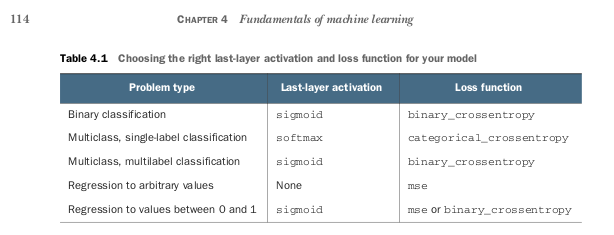

#### 6. Scaling up: developing a model that overfits:

The universal problem in machine learning is between optimization and generalization; the ideal model is one tha stands right at the border between underfitting and overfitting; between undercapacity and overcapacity. To figure out where this border lies, first you must cross it. In deep learning, this checking is easier:

a. add layers

b. make the layers bigger

c. train for more epochs

Always monitor the training loss and validation loss, as well as the training and validation values for any metrics you care about.


#### 7. Regularizing your model and training your hyperparameters:

Try:

a. Adding dropout

b. try different architectures: add or remove layers

c. Add L1 and /or L2 regularization

d. Try different hyperparameters (such as number of units per layers or the learning rate of the optimizer) to find the optimal configuration.

e. Optionally, iterate on feature engineering: add new features, or remove features that don't seem to be informative.



# Chapter 5: Deep Learning from computer vision


## Introduction to convnets:

Before the theory before, let's look into its practical example. 


In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D (32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))       


In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


### Adding a classifier on top of the convnet

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [7]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 3
          , batch_size = 64)


Epoch 1/3
938/938 [==============================] - 37s 39ms/step - loss: 0.1661 - accuracy: 0.9486
Epoch 2/3
938/938 [==============================] - 36s 39ms/step - loss: 0.0466 - accuracy: 0.9857
Epoch 3/3
938/938 [==============================] - 37s 40ms/step - loss: 0.0331 - accuracy: 0.9901


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.0562 - accuracy: 0.9833


In [9]:
test_acc

0.983299970626831

### The convolution operation

The fundamental difference between a densely connected layer and a convolution layer is: 

Dense layers learn global patterns in their input feature space(for example, for a MNIST digit, pattern involving all pixels), whereas  convolution layers learn local patterns: in case of images, patterns found in small 2D windows of inputs. 

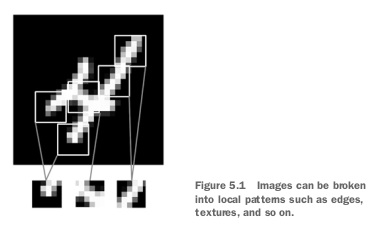


This key characteristic gives convnets two interesting properties:

1. The pattern they learn are translational invariant:

After learning a certain pattern in lower-right corner of a picture, a convnet can recognize it anywhere: for example, in the upper-left corner. A densely connected network would have to learn the pattern anew if it appends at a new location. This make convnets data efficient when processing images(because the visual world is fundamentally translation invariant): they need fewer training samples to learn representations that have generalization power. 

2. They can learn spatial hierarchies of patterns: 

A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger pattern made of the features of the first layers, and so on. This allows convnets to efficiently learn increasingly complex and abstract visual concepts (because the visual world is fundamentally spatially hierarchical)


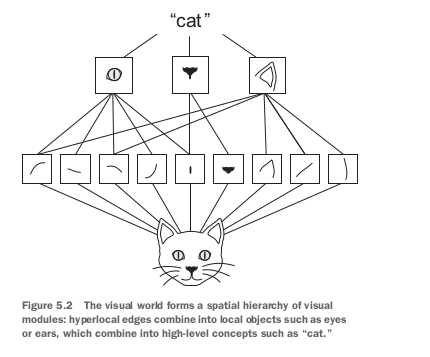

Convolutions operate over 3D tensors, called feature maps, with two spatial axes (height and width) as well as a depth axis (also called the channel axis). 


Convolutions are defined by two key parameters:

1. Size of the patches extracted from the inputs: They are typically 3x3 or 5x5

2. Depth of the output feature map: The number of filters computed by the convolution. The example started with a depth of 32 and ended with a depth of 64.

